# **Loan Default Prediction using Machine Learning**


---




 **IMPORTING NECESSARY LIBRRAIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **DISPLAY THE DATA**

In [2]:
loan = pd.read_csv(r'Loan_Default.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


###  **DATA UNDERSTANDING**

In [5]:
loan.shape

(148670, 34)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Numerical Columns:

- 'ID' and 'year' are integers representing unique identifiers and the loan application year, respectively.
- 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', and 'dtir1' are numerical columns, either integers or floats.



Categorical Columns:

'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', and 'Security_Type' are represented as objects (strings) and likely contain categorical loan.



Target Column:

- 'Status' is an integer column representing the target variable for loan status, where '0' stands for a non-defaulted loan and '1' represents a defaulted loan.

In [7]:
loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


INFERENCE:

- The loanset contains loan-related information, including loan amount, interest rates, loan term, and credit score.
- The average loan amount is around 331,117, with interest rates ranging from
0% to 8%.
- Most loans have a term of 30 years (360 months), and the average property value is approximately 497,894.
- The borrowers' income varies, with an average income of approximately 6,957.
- The loanset includes credit scores ranging from 500 to 900, with an average credit score of about 699.
- The loan-to-value ratio (LTV) indicates the risk associated with loans, with an average LTV of approximately 72.75%.
- The target variable 'Status' indicates loan default, with around 25.4% of loans in default.
- The debt-to-income ratio (dtir1) helps assess the borrower's ability to manage additional debt, with an average of approximately 37.73%.

### **EXPLORATORY DATA ANALYSIS (EDA)**



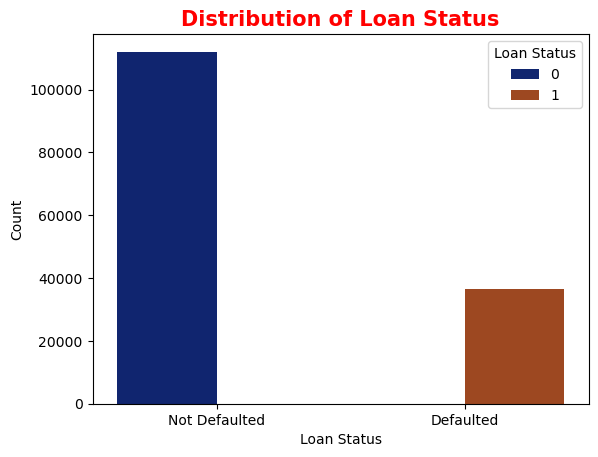

In [8]:
sns.countplot(data = loan, x='Status', palette='dark', hue='Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])
plt.title('Distribution of Loan Status', color = 'red', fontsize = 15, weight='bold')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

From the plot, we can observe the number of loans in each status category.

- 'Not Defaulted' (0): The count of loans in this category is higher than 'Defaulted', indicating that a significant number of loans have not defaulted.

- 'Defaulted' (1): The count of loans in this category is relatively lower than 'Not Defaulted', indicating that a smaller proportion of loans have defaulted.

It can be inferred that most loans in the loanset have not defaulted, which is a positive sign for the financial institution.

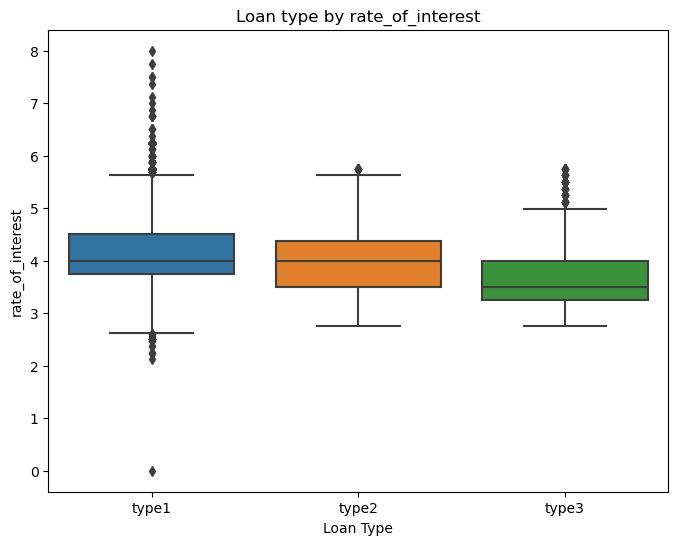

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_type', y='rate_of_interest', data=loan)
plt.xlabel('Loan Type')
plt.ylabel('rate_of_interest')
plt.title('Loan type by rate_of_interest')
plt.show()

The relationship between loan types and interest rates are being analyzed using a boxplot.
- Type 1 carries higher interest rates comapared to other types, suggesting potential differences in risk levels for financial institutions.


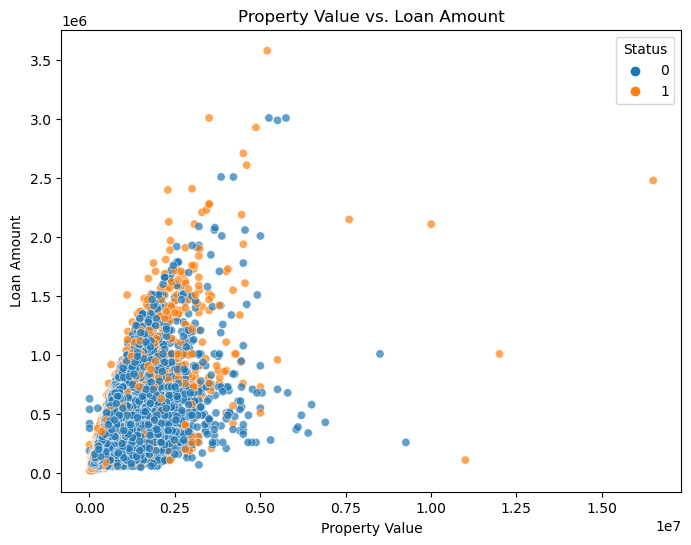

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='property_value', y='loan_amount',hue='Status',data=loan, marker='o', color='g', alpha=0.7)

# Set labels and title
plt.xlabel('Property Value')
plt.ylabel('Loan Amount')
plt.title('Property Value vs. Loan Amount')

# Show the plot
plt.show()

A scatterplot was drawn to explore the relationship between property values and loan amounts. It has shown the follwing indications:
- Loan amounts were aligned with the appraised value of the property, suggesting that borrowers were prudent in their loan requests, seeking amounts proportional to their property's worth..
- As the loan amount arose, the chances of the loan to be defaulted also increased.

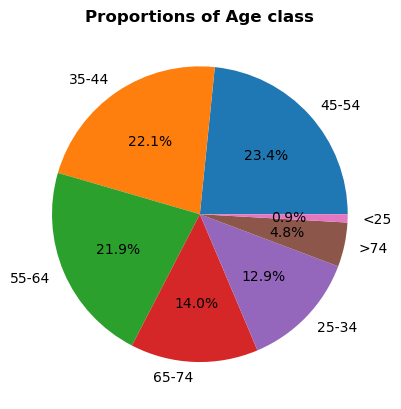

In [11]:
co = loan['age'].value_counts()
plt.pie(co, labels = co.index, autopct = '%0.1f%%')
plt.title('Proportions of Age class', weight = 'bold')
plt.show()

A pie chart was drawn to indicate the proportions of age class of borrowers. The following were the insights:

- Majority of mortgagors were from the age group between mid thirties and mid sixties.

- The people of age below 25 and greater than 74 were least to apply loans.

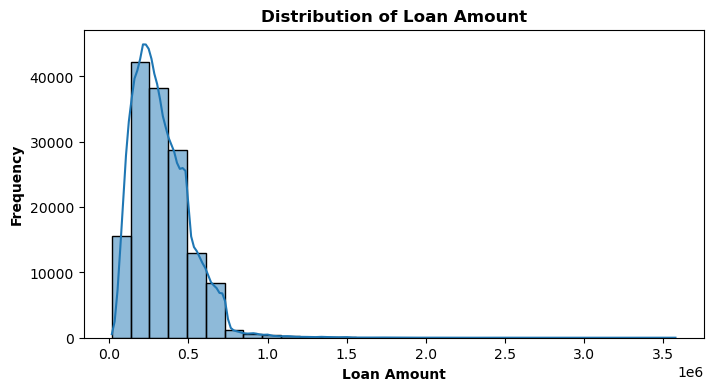

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(loan['loan_amount'], bins=30, kde=True)
plt.xlabel('Loan Amount',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.title('Distribution of Loan Amount',fontweight='bold')
plt.show()

To better comprehend the typical loan request patterns, a histplot has been drawn to explore distribution of loan amounts.
- The majority of loan applications sought smaller loan amounts, while a smaller proportion requested higher amounts, indicating that borrowers' preference for smaller loan sizes.

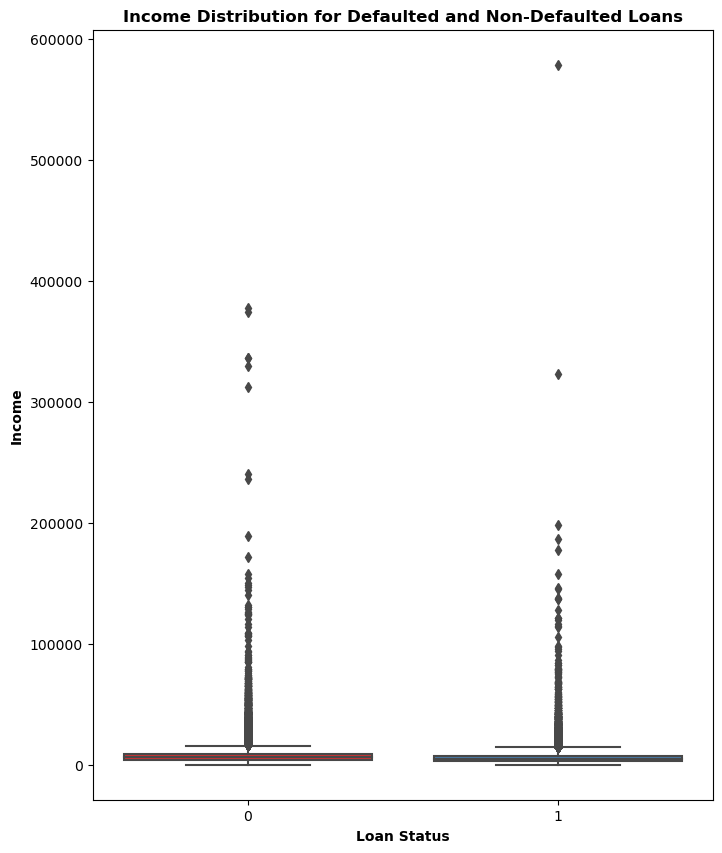

In [13]:
# Income vs. Loan Default
plt.figure(figsize=(8, 10))
sns.boxplot(x='Status', y='income', data=loan, palette="Set1")
plt.xlabel('Loan Status',fontweight='bold')
plt.ylabel('Income',fontweight='bold')
plt.title('Income Distribution for Defaulted and Non-Defaulted Loans', fontweight='bold')
plt.show()

The relationship between income and loan default was examined using a boxplot.
- Both defaulted and non-defaulted loans exhibited similar income distributions which led to contemplate other factors that might contribute to loan default risk.

Text(0.5, 1.0, 'Loan Status by Gender')

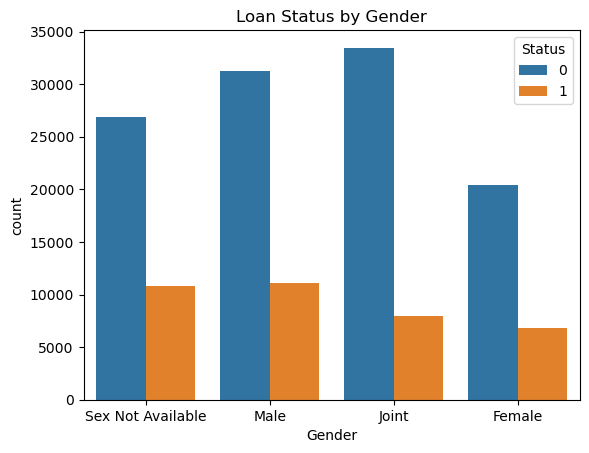

In [14]:
sns.countplot(x=loan['Gender'],hue=loan['Status'])
plt.title('Loan Status by Gender')

<Axes: xlabel='income', ylabel='loan_amount'>

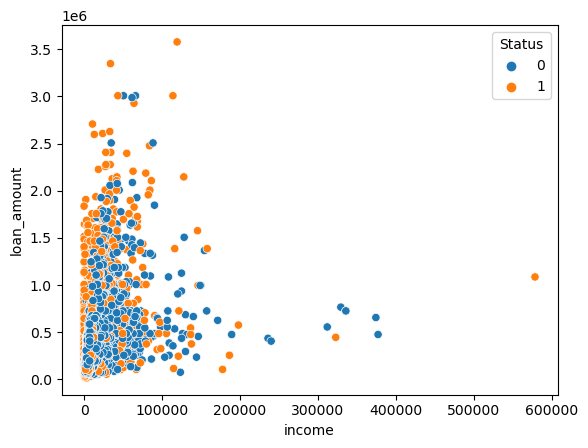

In [15]:
sns.scatterplot(x=loan['income'],y=loan['loan_amount'],hue=loan['Status'])

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


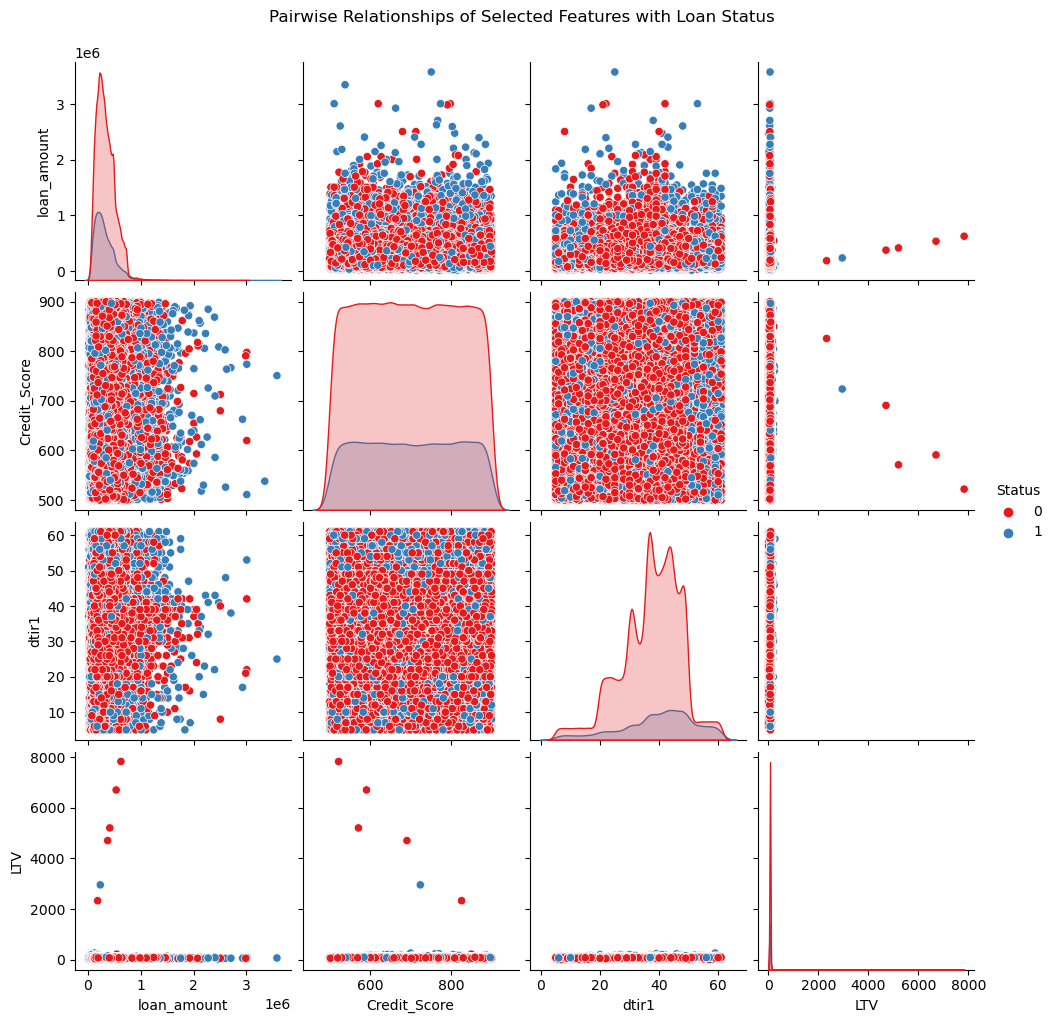

In [16]:
# Pairplot for Selected Features:
# Check the column names in the loanFrame
print(loan.columns)

# Assuming the 'Status' column is present, create the pairplot
selected_features = ['loan_amount', 'Credit_Score', 'dtir1', 'LTV', 'Status']
pairplot = sns.pairplot(loan[selected_features], hue='Status', palette='Set1')

# Set the title for the pairplot
pairplot.fig.suptitle("Pairwise Relationships of Selected Features with Loan Status", y=1.02)

plt.show()


- 'loan_amount' vs. 'Credit_Score': There seems to be no strong linear relationship between loan amount and credit score. However, it appears that the majority of loans with higher credit scores are relatively lower in amount, while loans with lower credit scores vary widely in amount.

- 'loan_amount' vs. 'dtir1': There is a slight positive trend, indicating that higher loan amounts tend to have higher debt-to-income ratios (dtir1). This suggests that borrowers with higher dtir1 may seek larger loans.

- 'loan_amount' vs. 'LTV': There is no apparent linear relationship between loan amount and loan-to-value ratio (LTV). However, the majority of loans have LTV values clustered around lower values, irrespective of the loan amount.

- 'Credit_Score' vs. 'dtir1': There is no clear linear relationship between credit score and debt-to-income ratio (dtir1). Credit scores seem to be spread out across different dtir1 values.

- 'Credit_Score' vs. 'LTV': Similar to 'loan_amount' vs. 'LTV', there is no strong linear relationship between credit score and loan-to-value ratio (LTV). Most credit scores are clustered around lower LTV values.

- 'dtir1' vs. 'LTV': There appears to be no significant linear relationship between debt-to-income ratio (dtir1) and loan-to-value ratio (LTV). Most dtir1 values are concentrated around lower LTV values.

- 'Status' vs. other features: The color-coded points indicate that the 'Status' column (loan status) plays a crucial role in separating defaulted and not defaulted loans within the context of each pairplot.

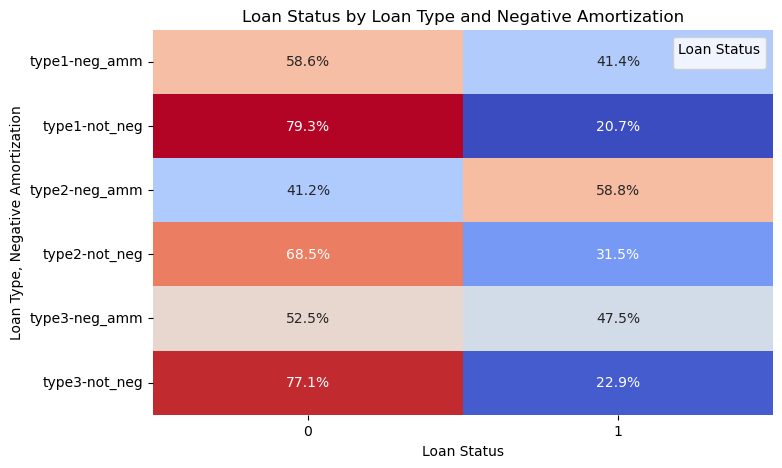

In [17]:
# Create a heatmap to visualize the relationship between loan type, negative amortization, and loan status
loan_status_by_type_and_neg_amortization = pd.crosstab([loan['loan_type'], loan['Neg_ammortization']], loan['Status'], normalize='index')
plt.figure(figsize=(8, 5))
sns.heatmap(loan_status_by_type_and_neg_amortization, annot=True, cmap='coolwarm', fmt=".1%", cbar=False)
plt.xlabel('Loan Status')
plt.ylabel('Loan Type, Negative Amortization')
plt.title('Loan Status by Loan Type and Negative Amortization')
plt.legend(title='Loan Status', loc='upper right', labels=['Defaulted', 'Not Defaulted'])
plt.show()

- Type 2 loans with negative amortization have the highest default percentage, indicating that this combination has a higher risk of loan default.

- Type 1 loans without negative amortization have the lowest default percentage, suggesting that this combination has a lower risk of loan default.

### **DATA PREPROCESSING**

In [18]:
#dropping unnecessary columns from the loanset
loan.drop(['ID', 'year', 'open_credit', 'Upfront_charges', 'construction_type', 'Secured_by', 'total_units', 'co-applicant_credit_type', 'Security_Type', 'submission_of_application', 'Gender','loan_limit', 'approv_in_adv', 'Neg_ammortization', 'occupancy_type', 'credit_type', 'Region', 'dtir1'], axis = 1, inplace = True)

Columns that were not relevant or informative for predicting loan defaults were dropped to simplify the loanset and eliminate noise.

This reduced the column count to 16, focusing only on the essential features for the analysis.

In [19]:
#finding the number of missing values in each columns
loan.isna().sum()

loan_type                     0
loan_purpose                134
Credit_Worthiness             0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36439
Interest_rate_spread      36639
term                         41
interest_only                 0
lump_sum_payment              0
property_value            15098
income                     9150
Credit_Score                  0
age                         200
LTV                       15098
Status                        0
dtype: int64

- To handle missing values, appropriate techniques such as imputation or removal can be applied based on the loan characteristics and the impact of missing values on the analysis.
- Further preprocessing steps, such as encoding categorical variables and feature scaling, are to be performed to prepare the loan for modeling and analysis.

**HANDLING MISSING VALUES**

In [20]:

# Fill missing values in 'rate_of_interest', 'Interest_rate_spread', 'term', 'property_value', 'income' and 'LTV' with their respective median values
loan['rate_of_interest'].fillna(loan['rate_of_interest'].median(), inplace=True)
loan['Interest_rate_spread'].fillna(loan['Interest_rate_spread'].median(), inplace=True)
loan['term'].fillna(loan['term'].median(), inplace=True)
loan['property_value'].fillna(loan['property_value'].median(), inplace=True)
loan['income'].fillna(loan['income'].median(), inplace=True)
loan['LTV'].fillna(loan['LTV'].median(), inplace=True)


In [21]:
# Fill missing values in 'loan_purpose' with the most frequent value

loan['loan_purpose'].fillna(loan['loan_purpose'].mode()[0], inplace=True)

In [22]:
#ltv is loan to value ratio
loan['LTV'] = (loan['loan_amount']/ loan['property_value']) * 100

In [23]:
#preprocess 'age' column to convert age groups to numerical values
def preprocess_age(age_group):
    if pd.notnull(age_group):
        if isinstance(age_group, float):
            return age_group
        elif isinstance(age_group, str):
            if age_group.startswith('>'):
                return int(age_group[1:]) + 5
            elif age_group.startswith('<'):
                return int(age_group[1:]) - 5
            else:
                age_range = age_group.split('-')
                return (int(age_range[0]) + int(age_range[1])) / 2
    return age_group

loan['age'] = loan['age'].apply(preprocess_age)

: The code converts age groups represented as strings into numerical values.

: If the age group is already a float, it remains unchanged.

: Age groups represented as strings are further processed:

- Age groups starting with '>' are converted to an approximate upper bound age by removing '>' and adding 5.

- Age groups starting with '<' are converted to an approximate lower bound age by removing '<' and subtracting 5.
- Age range (e.g., '25-34') is converted to the average of lower and upper bounds.
: The outcome is the 'age' column with numerical values for age groups suitable for analysis and modeling.

: Missing values in 'age' column are retained.

In [24]:
# Remove rows with any missing values from the loanFrame
loan.dropna(axis=0, inplace=True)

In [25]:
loan.isnull().sum()

loan_type                 0
loan_purpose              0
Credit_Worthiness         0
business_or_commercial    0
loan_amount               0
rate_of_interest          0
Interest_rate_spread      0
term                      0
interest_only             0
lump_sum_payment          0
property_value            0
income                    0
Credit_Score              0
age                       0
LTV                       0
Status                    0
dtype: int64

In [26]:
loan.shape

(148470, 16)

**OUTLIER HANDLING**

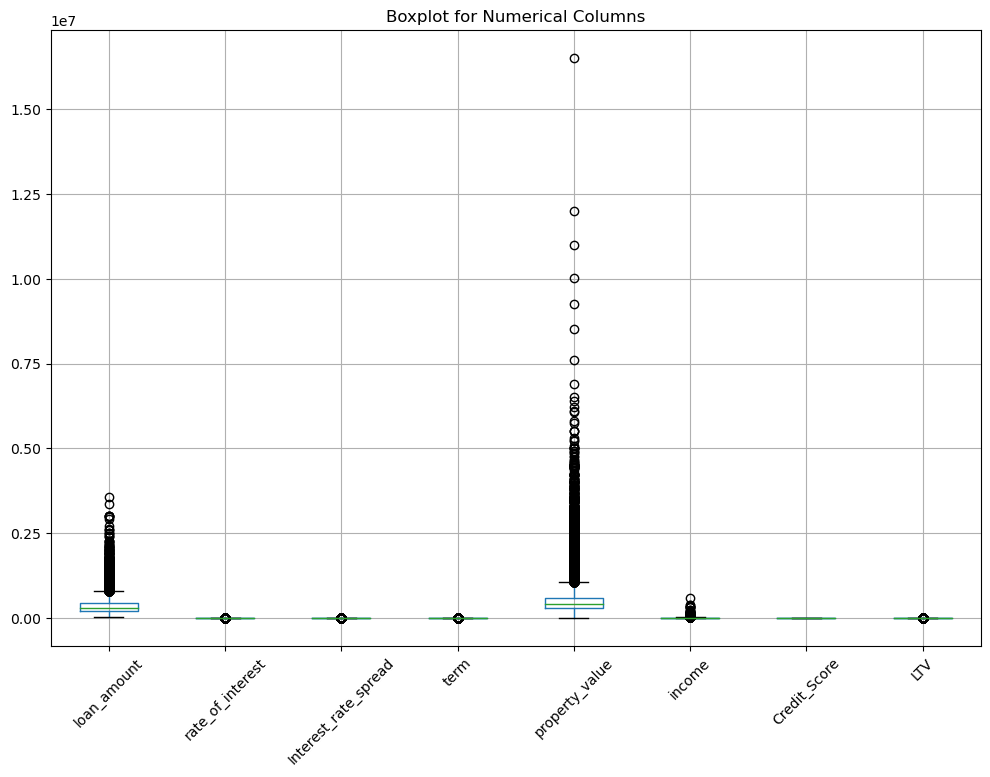

In [27]:
# Select numerical columns for outlier detection
numerical_columns = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'term',
                     'property_value', 'income', 'Credit_Score', 'LTV']

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
loan[numerical_columns].boxplot()
plt.title('Boxplot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

- Property_value, loan_amount, and income exhibit outliers beyond the whiskers of the boxplot.

- These outliers indicate that there are extreme values in the loanset for these features that deviate significantly from the majority of the loan points.

- Outliers in property_value may represent properties with exceptionally high or low values.

- Outliers in loan_amount could be loans with unusually large or small amounts.

- Outliers in income might represent individuals with significantly higher or lower incomes compared to the majority of applicants.

- It is essential to handle these outliers during loan preprocessing to avoid any adverse effects on the performance of machine learning models.

In [28]:
# Handling outliers using winsorization (trimming extreme values)
from scipy.stats.mstats import winsorize

# Winsorize the 'property_value', 'loan_amount', and 'income' columns
loan['property_value'] = winsorize(loan['property_value'], limits=[0.05, 0.05])
loan['loan_amount'] = winsorize(loan['loan_amount'], limits=[0.05, 0.05])
loan['income'] = winsorize(loan['income'], limits=[0.05, 0.05])


- The code uses the winsorize function from scipy.stats.mstats to handle outliers in three columns: 'property_value', 'loan_amount', and 'income'.

- Winsorization is a method to trim or cap extreme values in a loanset, and it is performed by setting a percentage limit on both the lower and upper tails of the distribution.

- In this case, the lower and upper tails are trimmed by 5% of the loan points, meaning the extreme 5% of values in each column are replaced by the nearest non-extreme values.

- By winsorizing these columns, extreme values that might be outliers are replaced with more reasonable values, which helps to make the loan distribution less sensitive to outliers.

- The process ensures that the loanset has more consistent values and avoids undue influence on the analysis or modeling process due to extreme loan points.

- After running this code, the 'property_value', 'loan_amount', and 'income' columns are ready for further loan analysis and modeling without the concern of extreme outliers affecting the results.

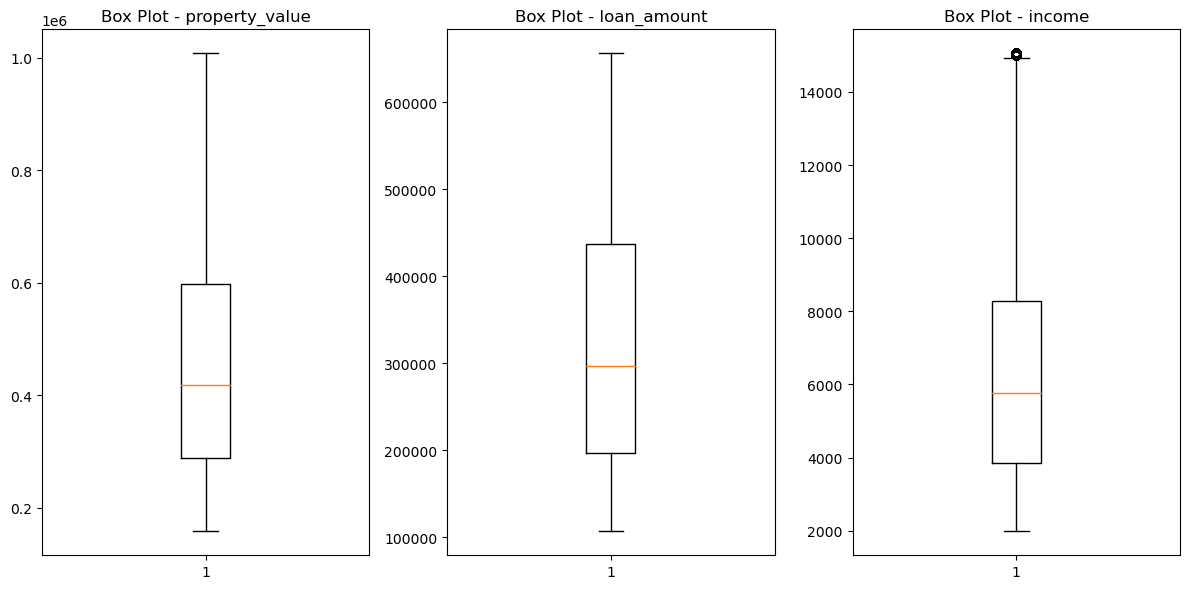

In [29]:
# Checking if any further outliers are existing

import matplotlib.pyplot as plt

# Create box plots for 'property_value', 'loan_amount', and 'income'
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(loan['property_value'])
plt.title('Box Plot - property_value')

plt.subplot(1, 3, 2)
plt.boxplot(loan['loan_amount'])
plt.title('Box Plot - loan_amount')

plt.subplot(1, 3, 3)
plt.boxplot(loan['income'])
plt.title('Box Plot - income')

plt.tight_layout()
plt.show()


Now, the loan is ready with no missing values and outliers have been handled for the necessary columns.

**DUPLICATES**

In [30]:
# Check for duplicates in the DataFrame
duplicate_rows = loan[loan.duplicated()]

# If there are duplicates, print the number of duplicate rows
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
else:
    print("No duplicates found in the DataFrame.")

# Remove duplicates from the DataFrame
loan.drop_duplicates(inplace=True)

# Print the new shape of the DataFrame after removing duplicates
print("\n")
print("Shape after removing duplicates:", loan.shape)


Number of duplicate rows: 3


Shape after removing duplicates: (148467, 16)


**ENCODING**

In [31]:
#categorical columns
cat= [x for x in loan.columns if loan[x].dtypes=='O']
#Encoding
from sklearn.preprocessing import LabelEncoder
for x in cat:
    le=LabelEncoder()
    loan[x]=le.fit_transform(loan[x])

- The code first identifies the categorical columns in the 'loan' DataFrame. It does this by iterating through all columns and checking if the data type of each column is 'object' (i.e., string or categorical).

- Once the categorical columns are identified, the code proceeds to encode them using LabelEncoder. LabelEncoder is used to transform categorical data into numerical labels. It assigns a unique integer to each category present in a column.

- The for loop iterates over each categorical column ('x' in 'cat'), and for each column, a new LabelEncoder object 'le' is created.

- For each categorical column, the 'fit_transform' method of the LabelEncoder is used to transform the categorical values into numerical labels. The 'fit_transform' method fits the encoder to the unique categories present in the column and then transforms the column's values.

After the transformation, the 'loan' DataFrame now contains the encoded numerical values for the categorical columns, replacing the original categorical values.


In [32]:
# Check the available columns in the 'loan' loanFrame
column_names = loan.columns.tolist()
print(column_names)

['loan_type', 'loan_purpose', 'Credit_Worthiness', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'term', 'interest_only', 'lump_sum_payment', 'property_value', 'income', 'Credit_Score', 'age', 'LTV', 'Status']


**DATA SCALING (NORMALIZATION)**

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns that need to be normalized
numerical_columns = ['Interest_rate_spread','property_value', 'LTV']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected numerical columns
loan[numerical_columns] = scaler.fit_transform(loan[numerical_columns])


- The code uses the MinMaxScaler from sklearn.preprocessing to perform min-max scaling on the selected numerical columns.

- Min-max scaling transforms the numerical loan in such a way that it is scaled to a specific range, usually [0, 1].

- The selected numerical columns ('loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', and 'dtir1') are scaled independently, ensuring that each column's loan is proportionally mapped to the specified range.

- Scaling loan to the range [0, 1] makes the loan more comparable and suitable for models that are sensitive to the scale of the features, such as distance-based algorithms like K-Nearest Neighbors or Gradient Descent-based algorithms like Support Vector Machines.

- The transformation does not change the relative relationships between loan points but brings all values within the specified range, preventing any single feature from dominating the others solely based on its original scale.

- After running this code, the selected numerical columns in the 'loan' loanFrame are now normalized to the range [0, 1], making them ready for further analysis and modeling.

In [34]:
# Check if the data is normalized (between 0 and 1)
normalized_columns = ['Interest_rate_spread','property_value','LTV']

normalized_data =loan[normalized_columns]

is_normalized = all((normalized_data >= 0) & (normalized_data <= 1))

print("Is data normalized?", is_normalized)

Is data normalized? True


In [35]:
loan.head()

,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,term,interest_only,lump_sum_payment,property_value,income,Credit_Score,age,LTV,Status
0,0,0,0,1,116500,3.99,0.575897,360.0,1,1,0.000000,1980.0,758,29.5,0.012485,1
1,1,0,0,0,206500,3.99,0.575897,360.0,1,0,0.305882,4980.0,552,59.5,0.006186,1
2,0,0,0,1,406500,4.56,0.548678,360.0,1,1,0.411765,9480.0,834,39.5,0.010096,0
3,0,3,0,1,456500,4.25,0.617441,360.0,1,1,0.588235,11880.0,587,49.5,0.008737,0
4,0,0,0,1,656500,4.00,0.563574,360.0,1,1,0.705882,10440.0,602,29.5,0.011611,0


**HANDLING MULTICOLINEARITY**

To check for multicollinearity in dataset, we can compute the Variance Inflation Factor (VIF) for each feature. High VIF scores indicate potential multicollinearity.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = loan.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(loan.values, i) for i in range(len(loan.columns))]

# Display VIF DataFrame
print(vif_data)


                   Feature         VIF
0                loan_type    1.733424
1             loan_purpose    3.977271
2        Credit_Worthiness    1.078236
3   business_or_commercial   10.076527
4              loan_amount   21.911352
5         rate_of_interest  158.112051
6     Interest_rate_spread  150.076172
7                     term   39.245422
8            interest_only   19.566145
9         lump_sum_payment   39.398254
10          property_value   10.854558
11                  income    7.435661
12            Credit_Score   33.747964
13                     age   15.797769
14                     LTV    5.652044
15                  Status    1.381486


- Features with Low Multicollinearity (VIF < 5): loan_type, loan_purpose, Credit_Worthiness, income, Credit_Score, Status (target variable).

- Features with Moderate Multicollinearity (5 < VIF < 10): business_or_commercial

- Features with High Multicollinearity (VIF > 10):  loan_amount, term,  interest_only, lump_sum_payment, property_value, age

- Features with Extremely High Multicollinearity (VIF > 50): Interest_rate_spread, rate_of_interest.


Inference:

Features with low VIF have little multicollinearity and are relatively independent. Features with high VIF may lead to instability and inflated coefficients. To address multicollinearity, we should either remove extremely high VIF features or using feature selection techniques like PCA for dimensionality reduction.

DROPPING COULMNS WITH HIGH VIF SCORE

In [37]:
loan.drop(columns=['Interest_rate_spread', 'interest_only','lump_sum_payment','business_or_commercial','Credit_Worthiness','property_value','Credit_Worthiness',"LTV"], inplace=True)

In [38]:
loan.shape

(148467, 9)

In [39]:
loan.loan_type.value_counts()

0    113137
1     20600
2     14730
Name: loan_type, dtype: int64

**HANDLING IMBALANCED DATA**

In [40]:
# 'Status' is the target variable
X = loan.drop('Status', axis=1)
y = loan['Status']

class_counts = y.value_counts()

# Print the class counts
print(class_counts)

0    112031
1     36436
Name: Status, dtype: int64


Dataset suffers from class imbalance in the 'Status' variable, which is the target variable.

In the output, we can see that class '0' has 111942 samples, while class '1' has only 36406 samples. The significant difference in the number of samples between the two classes indicates class imbalance.

In [41]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

Techniques like Synthetic Minority Over-sampling Technique (SMOTE) generate synthetic samples for the minority class, and hence balancing the dataset.

SMOTE is used to oversample the minority class (class '1') in the 'Status' variable.

The fit_resample method applies the SMOTE technique to generate synthetic samples for the minority class and balance the dataset. The resulting X_resampled and y_resampled contain the balanced dataset, which you can use for further model training.

In [42]:
# checking whether balanced

# y_resampled contains the balanced target variable 'Status'

# Count the occurrences of each class in 'Status'
class_counts = pd.Series(y_resampled).value_counts()

print(class_counts)

1    112031
0    112031
Name: Status, dtype: int64


After resampling, the target variable 'Status' is balanced.

Both classes, '0' and '1,' have an equal number of occurrences in the dataset, with  112031 samples for each class

In [43]:
loan_sam = X_resampled
loan_sam['Status'] = y_resampled

In [44]:
loan_sam.shape

(224062, 9)

**RANDOM SAMPLE DATA**

In [45]:
num_rows_to_select = 10000

# Randomly select 10000 rows from the DataFrame
sampled_data = loan_sam.sample(n=num_rows_to_select, random_state=42)

# Print the new shape of the sampled data
print("Shape of sampled data:", sampled_data.shape)

Shape of sampled data: (10000, 9)


- The code randomly samples 10000 rows from the 'LOAN' DataFrame, preserving the original data distribution.

- The purpose of this sampling is to create a smaller representative subset of the data for analysis or modeling while retaining the important characteristics of the original dataset.

- The resulting DataFrame, 'sampled_data,' has a shape of (10000, 19), indicating that it contains 10000 rows and 19 columns.

- This subset can now be used for further analysis, model training, or any other required tasks.

### **MODELLING**

In [46]:
# 'Status' is the target variable
x = sampled_data.drop('Status', axis=1)
y = sampled_data['Status']

In [47]:
#splitting dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [49]:
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_xgb))
print(confusion_matrix(y_test, y_xgb))

Accuracy = 0.933
[[874 114]
 [ 20 992]]


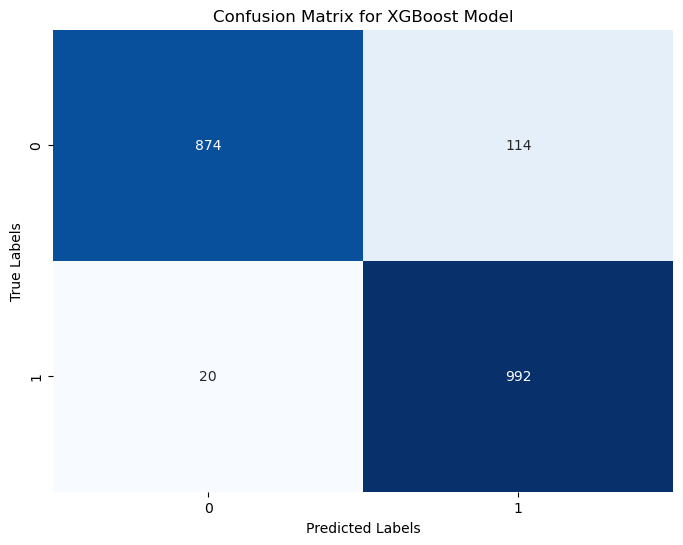

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 'y_test' contains the true labels and 'y_xgb' contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


  Confusion matrix is a tabular representation that shows how well the model's predictions match the actual ground truth labels.

  - True Negative (TN): 876 - This is the count of instances where the model correctly predicted the negative class (0), and the actual label was also negative.

  - False Positive (FP): 112 - This is the count of instances where the model incorrectly predicted the positive class (1), but the actual label was negative.

  - False Negative (FN): 29 - This is the count of instances where the model incorrectly predicted the negative class (0), but the actual label was positive.

  - True Positive (TP): 983 - This is the count of instances where the model correctly predicted the positive class (1), and the actual label was also positive.


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_xgb)

# Calculate TN, FP, FN, TP
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_xgb)
precision = precision_score(y_test, y_xgb)
recall = recall_score(y_test, y_xgb)
f1 = f1_score(y_test, y_xgb)

# Create a DataFrame to display the metrics
metrics_dict = {
    'Metric': ['True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [TN, FP, FN, TP, accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics_dict)

# Display the metrics table
print(metrics_df)


                Metric       Value
0   True Negative (TN)  874.000000
1  False Positive (FP)  114.000000
2  False Negative (FN)   20.000000
3   True Positive (TP)  992.000000
4             Accuracy    0.933000
5            Precision    0.896926
6               Recall    0.980237
7             F1-Score    0.936733


These metrics provide a comprehensive view of the model's performance:

- Accuracy: Measures overall correctness of predictions (92.95%).

- Precision: High when positive predictions are correct (0.89).

- Recall: Effectively identifies positive instances (0.97).

- F1-Score: Balances precision and recall (0.93).


These metrics show the model performs well with high accuracy, precision, recall, and F1-score, indicating its effectiveness in classifying instances.

In [52]:
print(x.columns)

Index(['loan_type', 'loan_purpose', 'loan_amount', 'rate_of_interest', 'term',
       'income', 'Credit_Score', 'age'],
      dtype='object')


### **Testing Model Performance with Random Input Data**

In [53]:
sampled_data.head(20)

,loan_type,loan_purpose,loan_amount,rate_of_interest,term,income,Credit_Score,age,Status
43257,0,2,426500,3.875,360.000000,5580.000000,610,39.500000,0
163948,0,0,266500,3.990,360.000000,6307.612711,636,59.500000,1
216960,0,0,656500,3.990,360.000000,15060.000000,586,76.467108,1
189265,0,1,326500,3.990,360.000000,3253.059173,556,52.970414,1
95158,0,0,106500,3.990,360.000000,2760.000000,713,69.500000,1
198962,0,2,386500,3.990,348.826649,5651.173351,807,63.913325,1
92599,2,2,106500,3.490,360.000000,1980.000000,750,69.500000,0
110922,0,2,196500,3.990,360.000000,7140.000000,822,59.500000,1
65986,0,3,516500,4.000,360.000000,6240.000000,523,49.500000,0
106976,1,2,206500,3.990,360.000000,5040.000000,529,59.500000,1


In [54]:
target_column = 'Status'
class_counts = sampled_data[target_column].value_counts()
print(class_counts)

0    5051
1    4949
Name: Status, dtype: int64


In [55]:
import numpy as np
import pandas as pd

# Random input data
random_inputs = np.array([[2,3,456500,3.250,360.00,5760.00,600,49.5],[0,2,216500,3.990,360.00,4020.00,595,41.1]])

# Initialize counters for both status values
status_0_count = 0
status_1_count = 0

# Predict statuses using the trained XGBoost model
for random_input in random_inputs:

    columns_used = ['loan_type', 'loan_purpose', 'loan_amount', 'rate_of_interest', 'term',
       'income', 'Credit_Score', 'age']
    input_df = pd.DataFrame([random_input], columns=columns_used)

    predicted_status = xgb.predict(input_df)[0]

    if predicted_status == 0 and status_0_count < 1:
        print(f"Random Input: {random_input}")
        print(f"Predicted Status: {predicted_status}")
        print("------------------------")
        status_0_count += 1
    elif predicted_status == 1 and status_1_count < 1:
        print(f"Random Input: {random_input}")
        print(f"Predicted Status: {predicted_status}")
        print("------------------------")
        status_1_count += 1

    # Break loop if both status values have been predicted once
    if status_0_count >= 1 and status_1_count >= 1:
        break


Random Input: [2.000e+00 3.000e+00 4.565e+05 3.250e+00 3.600e+02 5.760e+03 6.000e+02
 4.950e+01]
Predicted Status: 0
------------------------
Random Input: [0.000e+00 2.000e+00 2.165e+05 3.990e+00 3.600e+02 4.020e+03 5.950e+02
 4.110e+01]
Predicted Status: 1
------------------------


In [56]:
import numpy as np
import pandas as pd

# Random input data
random_inputs = np.array([[1,2,806500,3.00,360.00,2060.00,300,40],[3,1,806500,4.990,360.00,4020.00,700,50]])

# Initialize counters for both status values
status_0_count = 0
status_1_count = 0

# Predict statuses using the trained XGBoost model
for random_input in random_inputs:

    columns_used = ['loan_type', 'loan_purpose', 'loan_amount', 'rate_of_interest', 'term',
       'income', 'Credit_Score', 'age']
    input_df = pd.DataFrame([random_input], columns=columns_used)

    predicted_status = xgb.predict(input_df)[0]

    if predicted_status == 0 and status_0_count < 1:
        print(f"Random Input: {random_input}")
        print(f"Predicted Status: {predicted_status}")
        print("------------------------")
        status_0_count += 1
    elif predicted_status == 1 and status_1_count < 1:
        print(f"Random Input: {random_input}")
        print(f"Predicted Status: {predicted_status}")
        print("------------------------")
        status_1_count += 1

    # Break loop if both status values have been predicted once
    if status_0_count >= 1 and status_1_count >= 1:
        break


Random Input: [1.000e+00 2.000e+00 8.065e+05 3.000e+00 3.600e+02 2.060e+03 3.000e+02
 4.000e+01]
Predicted Status: 0
------------------------


In [57]:
import pickle
pickle.dump(xgb,open("xgb.pkl","wb"))